In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /Volumes/Additional Drive/Projects/ML-Supervised-Learning/HR-Employee-Attrition.csv
100%|████████████████████████████████████████| 228k/228k [00:00<00:00, 2.06MB/s]


In [3]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
import pickle
# Load data (deserialize)

with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [6]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233869,1,0,99,3,2,...,5,4,0,1,False,True,False,True,False,True
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,False,True,True,False,False,True
2,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,True,False,True,False,True,False
3,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,False,True,True,False,False,True
4,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,False,True,True,False,False,True


In [7]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

## Sklearn Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier(criterion='entropy') # we'll use criterion='gini' later
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
model.score(X_test, y_test) # test accuracy.

0.7336956521739131

In [12]:
model.score(X_train, y_train) # train accuracy.

1.0

In [13]:
# This is clearly overfitting

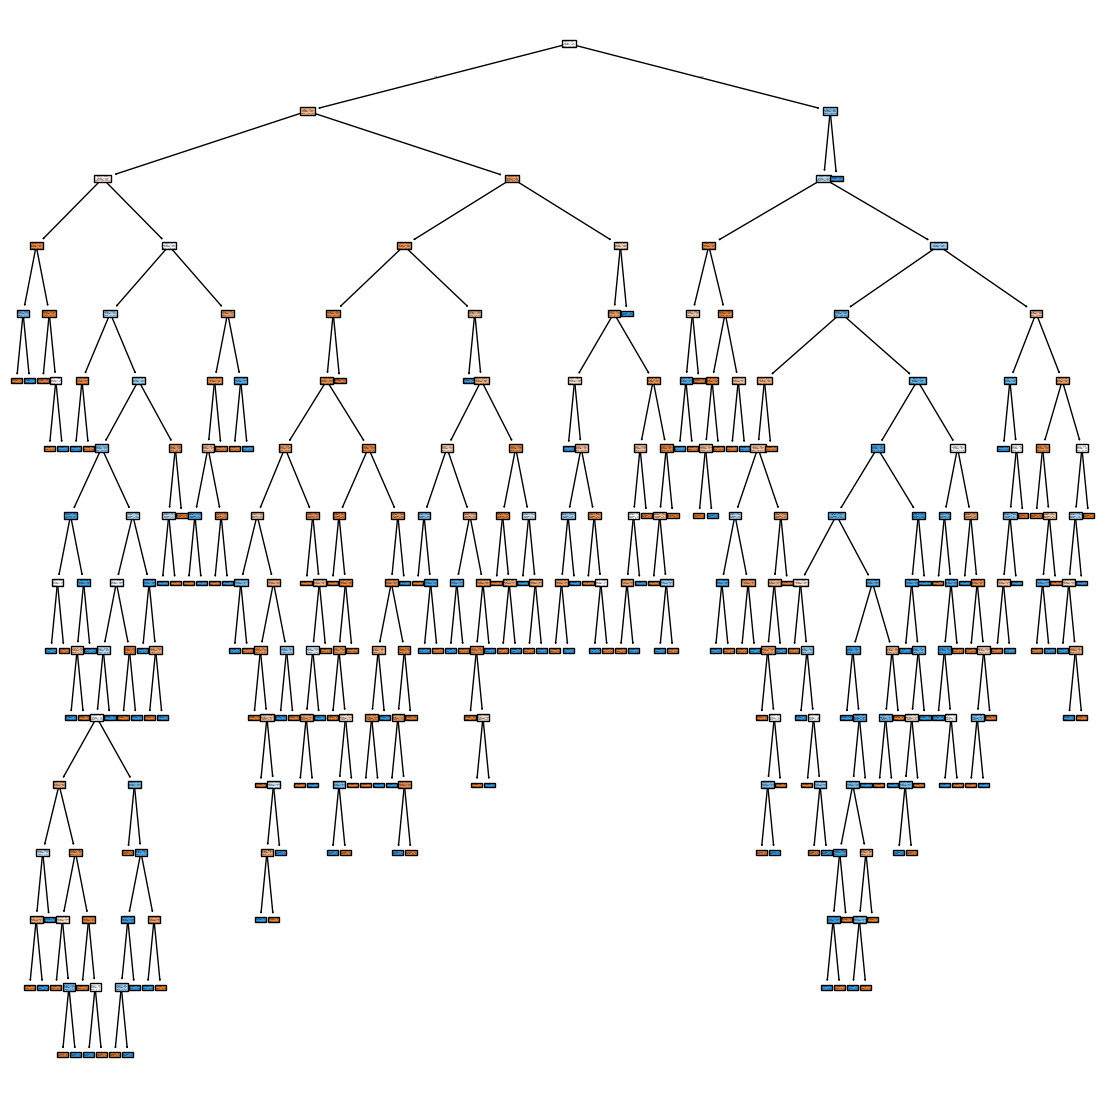

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

[Text(0.5769230769230769, 0.875, 'x[32] <= 0.5\nentropy = 1.0\nsamples = 1848\nvalue = [924, 924]'),
 Text(0.3076923076923077, 0.625, 'x[8] <= 2.5\nentropy = 0.883\nsamples = 959\nvalue = [670, 289]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[10] <= 0.064\nentropy = 0.996\nsamples = 366\nvalue = [196.0, 170.0]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'x[27] <= 0.5\nentropy = 0.723\nsamples = 593\nvalue = [474, 119]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'x[31] <= 0.5\nentropy = 0.863\nsamples = 889\nvalue = [254, 635]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[10] <= 0.09\nentropy = 0.973\nsamples = 628\nvalue = [254, 374]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n

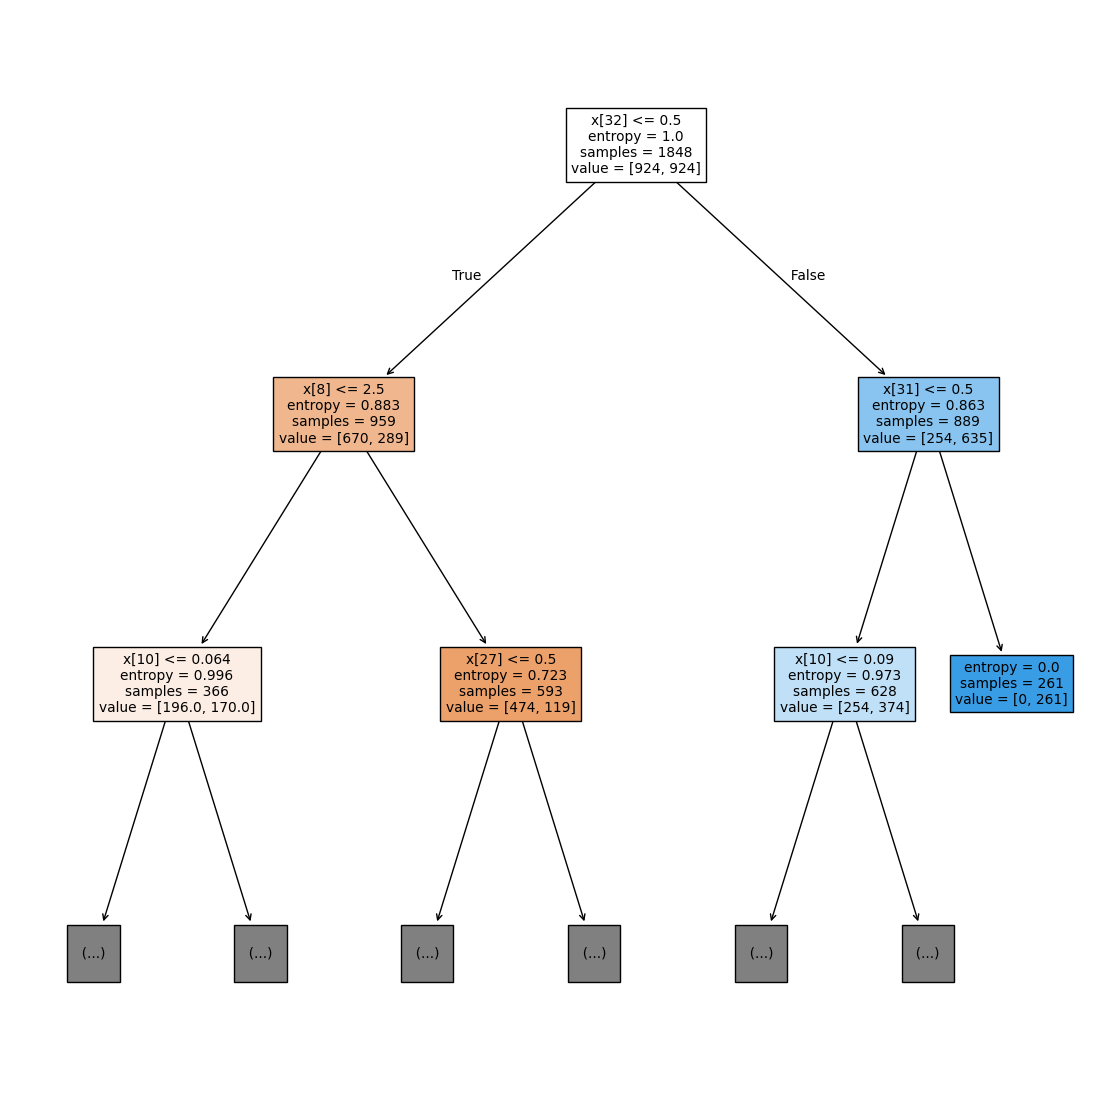

In [15]:
# Let's visualize the tree till depth 2
plt.figure(figsize=(14,14))
plot_tree(model, filled = True, max_depth=2)

In [20]:
# To avoid overfitting, let's try with max_depth=4
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
model.score(X_test, y_test) # test accuracy.

0.7336956521739131

In [22]:
model.score(X_train, y_train) # train accuracy.

0.8111471861471862

In [23]:
# Overfitting is reduced significantly